**Task**  
Use the data from Problem 1 task.  
Compute the percent increase or decrease from 1994-1998 to 2007-2008 for each product.  
Again make 2 charts: one for men and one for women.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#acces and open the xlsv file as a dataframe
path = "Appendix B (shares).xls"
xls = pd.ExcelFile(path)

In [4]:
# finding the necessary rows and cols
df_raw = pd.read_excel(path, sheet_name=0, header=None)
df_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Appendix Table B-1. LAFA at-home shares: 1994...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,U.S. total,NaN,NaN,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Children*,NaN,NaN,Adults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,%,Lower,Upper,%,Lower,Upper,%,Lower,Upper,NaN,NaN,NaN,NaN,NaN,NaN
6,Total fruit,85.6,84.85,86.35,82.13,80.99,83.27,87.22,86.27,88.17,NaN,NaN,NaN,NaN,NaN,NaN
7,"Apples, Total",86.56,85.3,87.82,83.35,81.71,84.99,89.32,87.48,91.16,NaN,NaN,NaN,NaN,NaN,NaN
8,Apples as fruit,86.71,85.41,88.01,80.55,78.23,82.87,89.81,88.32,91.3,NaN,NaN,NaN,NaN,NaN,NaN
9,Apple juice,86.42,84.18,88.66,84.82,82.67,86.97,88.62,84.24,93,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#finding the sheet names for the needed years
print(xls.sheet_names)

['94-98 FAH', '94-98 FAFH', '03-04 FAH', '03-04 FAFH', '05-06 FAH', '05-06 FAFH', '07-08 FAH', '07-08 FAFH']


In [11]:
# 1994-1998,
# 2003-2004,
# 2005-2006,
# 2007-2008 --> make into dict for analysis

fah_sheets = {
    "1994-1998": "94-98 FAH",
    "2003-2004": "03-04 FAH",
    "2005-2006": "05-06 FAH",
    "2007-2008": "07-08 FAH"
}

dfs_raw = {
    period: pd.read_excel(path, sheet_name=sheet, header=None)
    for period, sheet in fah_sheets.items()
}

In [12]:
#testing + print
dfs_raw["2007-2008"].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Appendix Table B-7. LAFA at-home shares: 2007...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,U.S. total,NaN,NaN,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Children*,NaN,NaN,Adults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,%,Lower,Upper,%,Lower,Upper,%,Lower,Upper,NaN,NaN,NaN,NaN,NaN,NaN
6,Total fruit,86.62,85.64,87.6,83.19,81.69,84.69,88.06,86.82,89.3,NaN,NaN,NaN,NaN,NaN,NaN
7,"Apples, Total",88.34,87.07,89.61,83.89,81.85,85.93,91.54,90,93.08,NaN,NaN,NaN,NaN,NaN,NaN
8,Apples as fruit,89.43,87.93,90.93,82.43,79.57,85.29,92.47,90.75,94.19,NaN,NaN,NaN,NaN,NaN,NaN
9,Apple juice,87.25,85.27,89.23,84.71,82.02,87.4,90.16,87.39,92.93,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# example testing
df_example = dfs_raw["2007-2008"]

#declaring the columns for men and women (will be used later)
men_col = 7
women_col = 9

bananas_row = df_example[df_example[0].astype(str).str.contains("Bananas", case=False, na=False)]
bananas_val = bananas_row.iloc[0, men_col]
print("Bananas (Men, 2007-2008):", bananas_val)

Bananas (Men, 2007-2008): 94.08


In [43]:
#getting fruits for the list
fruit_products = [
    "Apples as fruit", "Bananas", "Berries", "Grapes",
    "Melons", "Oranges, Total", "Other citrus fruit",
    "Stone fruit", "Tropical fruit"
]

#dairy products
dairy_products = [
    "Fluid milk", "Butter",  "Cheese",
    "Yogurt", "Dairy, Other"
]

# extract values for a list of products and a given column
def extract_products(df, products, col_index):
    values = {}
    for prod in products:
        row = df[df[0].astype(str).str.contains(prod, case=False, na=False)]
        if not row.empty:
            values[prod] = row.iloc[0, col_index]
        else:
            values[prod] = None
    return values

In [44]:
#building df for men and women for all the fruits listed
men_fruit = {}
women_fruit = {}

for period, df in dfs_raw.items():
    men_fruit[period] = extract_products(df, fruit_products, men_col)
    women_fruit[period] = extract_products(df, fruit_products, women_col)

men_fruit_df = pd.DataFrame.from_dict(men_fruit, orient="index")[fruit_products]
women_fruit_df = pd.DataFrame.from_dict(women_fruit, orient="index")[fruit_products]

In [45]:
print("Men Fruit:\n", men_fruit_df.head(), "\n")
print("Women Fruit:\n", women_fruit_df.head())

Men Fruit:
            Apples as fruit  Bananas  Berries  Grapes  Melons  Oranges, Total  \
1994-1998            89.81    94.78    82.90   88.47   83.09           87.61   
2003-2004            91.04    94.71    88.40   89.30   80.44           86.18   
2005-2006            90.62    94.62    91.29   92.57   88.35           87.22   
2007-2008            92.47    94.08    89.16   91.11   85.22           86.55   

           Other citrus fruit  Stone fruit  Tropical fruit  
1994-1998               80.24        89.27           77.75  
2003-2004               71.64        90.61           81.83  
2005-2006               74.15        91.09           76.76  
2007-2008               70.71        94.98           82.63   

Women Fruit:
            Apples as fruit  Bananas  Berries  Grapes  Melons  Oranges, Total  \
1994-1998            91.30    96.05    85.58   90.24   86.56           89.21   
2003-2004            93.01    96.03    91.01   92.12   86.98           88.84   
2005-2006            92.78

In [46]:
#building the df for dairy now
men_dairy = {}
women_dairy = {}

for period, df in dfs_raw.items():
    men_dairy[period] = extract_products(df, dairy_products, men_col)
    women_dairy[period] = extract_products(df, dairy_products, women_col)

men_dairy_df = pd.DataFrame.from_dict(men_dairy, orient="index")[dairy_products]
women_dairy_df = pd.DataFrame.from_dict(women_dairy, orient="index")[dairy_products]


In [47]:
print("Men Dairy:\n", men_dairy_df.head(), "\n")
print("Women Dairy:\n", women_dairy_df.head())

Men Dairy:
            Fluid milk  Butter  Cheese  Yogurt  Dairy, Other
1994-1998       84.41   67.95   59.50   88.75         66.08
2003-2004       88.87   73.36   57.82   89.19         71.57
2005-2006       89.12   78.53   58.51   94.66         67.78
2007-2008       88.11   75.47   58.33   91.19         71.12 

Women Dairy:
            Fluid milk  Butter  Cheese  Yogurt  Dairy, Other
1994-1998       86.61   72.92   61.67   91.31         69.33
2003-2004       89.96   76.82   60.04   93.21         74.53
2005-2006       90.08   80.97   60.75   96.92         70.85
2007-2008       89.39   78.56   60.79   94.18         73.86


In [55]:
# plotting function
def plot_group(df, title, filename):
    ax = df.plot(marker="o", figsize=(9,5))
    ax.set_xlabel("Time period")
    ax.set_ylabel("Mean pounds per person (lbs)")
    ax.set_title(title)
    ax.legend(loc="best", fontsize="small")

    # add data source text under the figure
    plt.figtext(0.5, -0.05,
                "Data source: U.S. Food Commodity Availability by Food Source, 1994-2008 — https://www.ers.usda.gov/publications/pub-details/?pubid=81817",
                ha="center", fontsize=8)

    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print("Saved:", filename)

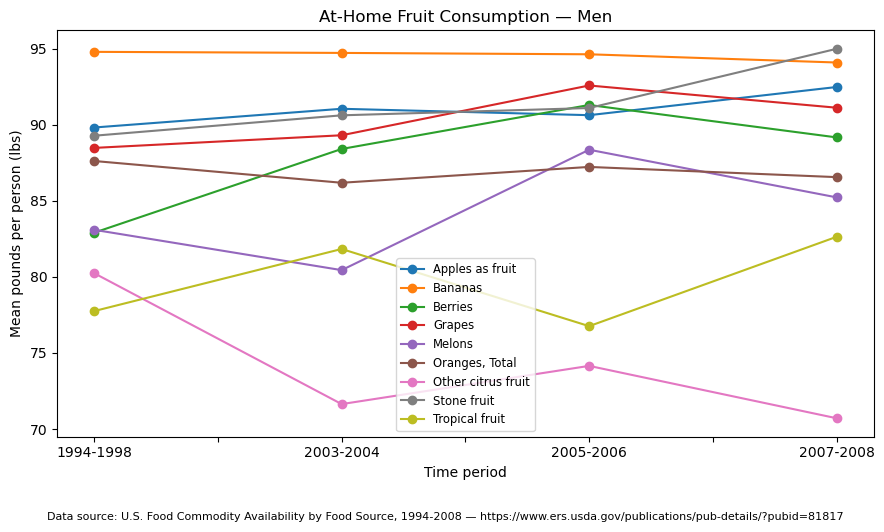

Saved: men_fruit.png


In [56]:
# call and print graphs (and save as images incase)
plot_group(men_fruit_df, "At-Home Fruit Consumption — Men", "men_fruit.png")

**Figure 1.** Mean at-home consumption of selected fruits by men across four time periods (1994–1998, 2003–2004, 2005–2006, 2007–2008). Consumption of bananas remained consistently high, while berries showed lower but relatively stable values. Moroever, we can see that the consumption of citrus fruits declined drasitcally over the years, while the demand for tropical fruits increased in men after 2005-2006.

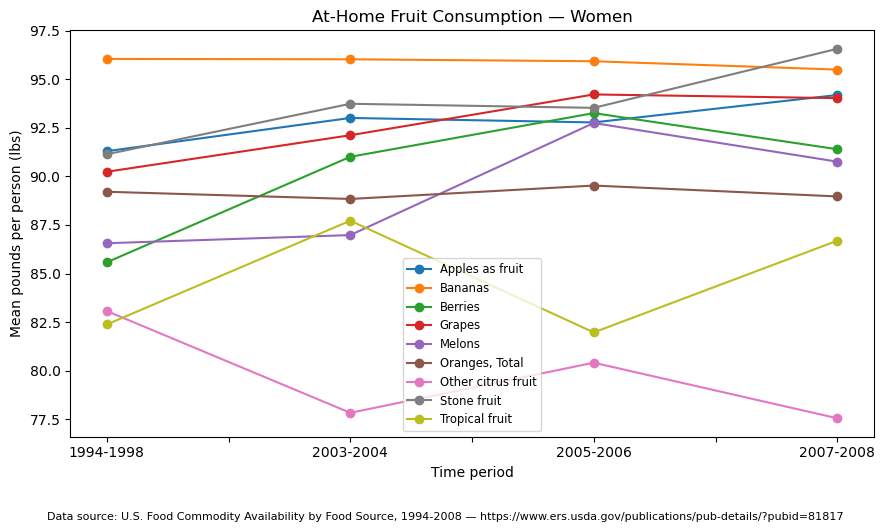

Saved: women_fruit.png


In [57]:
plot_group(women_fruit_df, "At-Home Fruit Consumption — Women", "women_fruit.png")

**Figure 2.** Mean at-home consumption of selected fruits by women across the four time periods. Bananas and apples again dominate, while tropical fruit and other citrus stay relatively low. The overall trends are pretty similar to consuption of fruits by men.

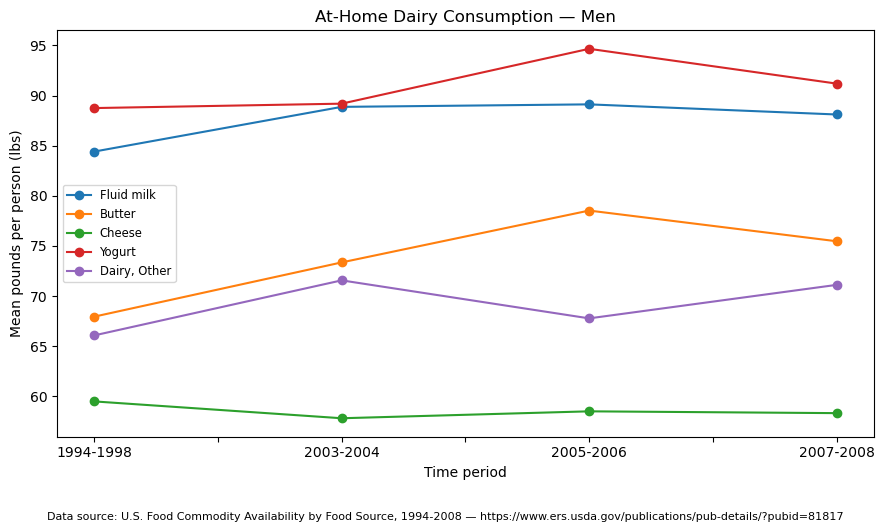

Saved: men_dairy.png


In [58]:
plot_group(men_dairy_df, "At-Home Dairy Consumption — Men", "men_dairy.png")


**Figure 3.** Mean at-home consumption of selected dairy products by men across the four time periods. Fluid milk and yogurt are the highest yogurt shows a gradual decline, while butter remains strong and other dairy product consumption increases slightly. The overall cheese consumption remained low throughout the years.

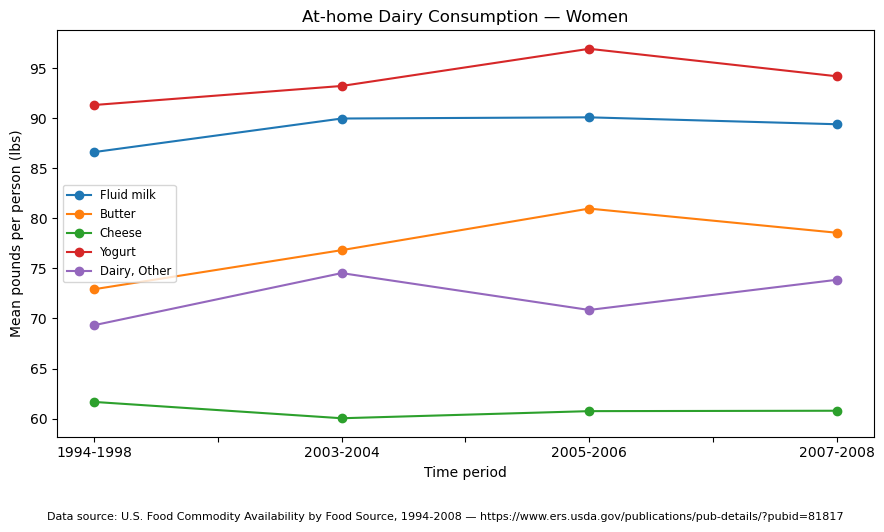

Saved: women_dairy.png


In [59]:
plot_group(women_dairy_df, "At-home Dairy Consumption — Women", "women_dairy.png")

**Figure 4.** Mean at-home consumption of selected dairy products by women across the four time periods. Though the overall trends stay the same as men consumption, women consumed a lot more yogurt, and the fluid milk consumption remained constant. However, everything else was comparable in trends with men's consumption of dairy.

In [ ]:
#exporting everything so it can be reused for next questions

men_fruit.to_csv("../problem2/men_fruit.csv")
women_fruit.to_csv("../problem2/women_fruit.csv")
men_dairy.to_csv("../problem2/men_dairy.csv")
women_dairy.to_csv("../problem2/women_dairy.csv")


NameError: name 'men_fruit_df' is not defined